<a href="https://colab.research.google.com/github/Shahupatil2407/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


<Axes: ylabel='count'>

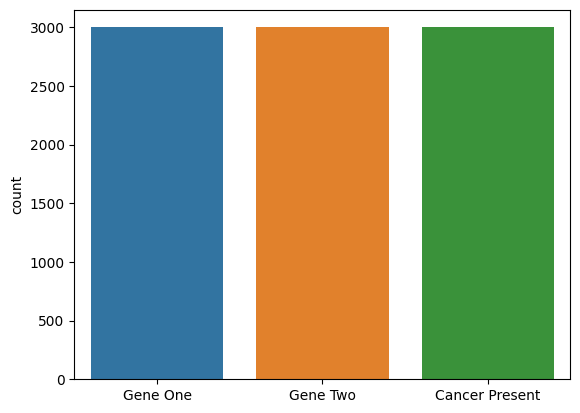

In [6]:
sns.countplot(data=df)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

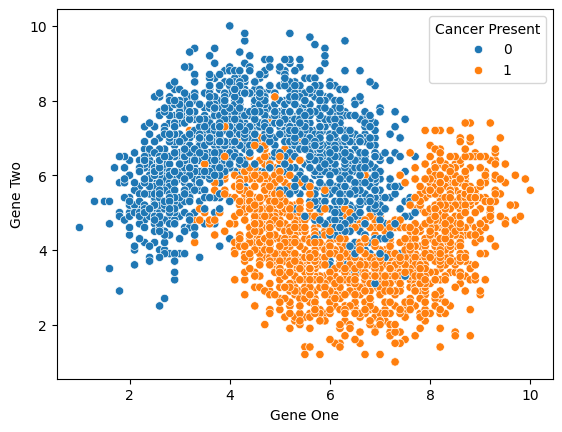

In [9]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

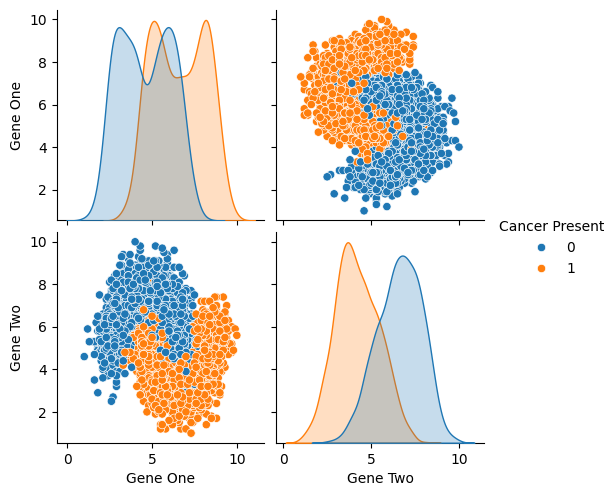

In [10]:
sns.pairplot(data=df, hue='Cancer Present')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier(n_neighbors=1)

In [22]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.91      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [31]:
confusion_matrix(y_test, y_pred)

array([[381,  42],
       [ 33, 444]])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.9166666666666666

Text(0, 0.5, 'Error Rate')

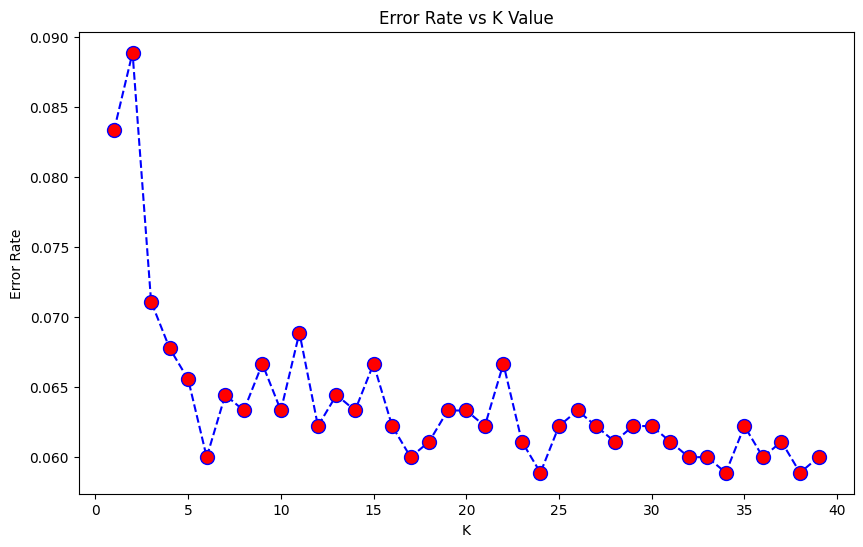

In [41]:
knn_error_rate = []
for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  knn_error_rate.append(1- accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6), dpi=100)
plt.title('Error Rate vs K Value')
plt.plot(range(1, 40), knn_error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')